In [5]:
#import the package
import pandas as pd
import numpy as np
import seaborn as sns


import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None


In [6]:
#read data

df=pd.read_excel(r'/home/salma/Projects/chouflihal/chouflihal_episodes.xlsx')
#let s look at the data
df.head()

,Season,Episode Number,Episode Description,Date of Release,Rating,Number of Raters
0,S1,E1,"Janet, the miserly owner of the building, asks...","Tue, Oct 4, 2005",9.0,58
1,S1,E2,Slimane is getting sick of being interrupted t...,"Wed, Oct 5, 2005",9.0,42
2,S1,E3,Janet has a client who pretends to be accompan...,"Thu, Oct 6, 2005",8.9,36
3,S1,E4,Sboui writes poem to offer it to Azza his belo...,"Fri, Oct 7, 2005",9.0,36
4,S1,E5,on a cold day Azza asks Sboui to go on the roo...,"Sat, Oct 8, 2005",8.9,31


In [7]:
#number missing data
print(df.isnull().sum())  

Season                 0
Episode Number         0
Episode Description    0
Date of Release        0
Rating                 0
Number of Raters       0
dtype: int64


In [8]:
df.describe()

,Season,Episode Number,Episode Description,Date of Release,Rating,Number of Raters
count,135,135,135,135,135,135
unique,6,30,134,76,26,22
top,S4,E1,"Tensions between Sboui and Slimane rise, as th...",2008,Not Available,Not Available
freq,30,6,2,30,66,66


In [9]:
df.dtypes

Season                 object
Episode Number         object
Episode Description    object
Date of Release        object
Rating                 object
Number of Raters       object
dtype: object

In [10]:
#convert data type
df['Date of Release'] = pd.to_datetime(df['Date of Release'], errors='coerce')

df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce').astype(float)


In [11]:
df.dtypes

Season                         object
Episode Number                 object
Episode Description            object
Date of Release        datetime64[ns]
Rating                        float64
Number of Raters               object
dtype: object

In [12]:
#mean rating
mean_rating = df['Rating'].mean()
print('Average rating is', mean_rating)


Average rating is 8.336231884057971


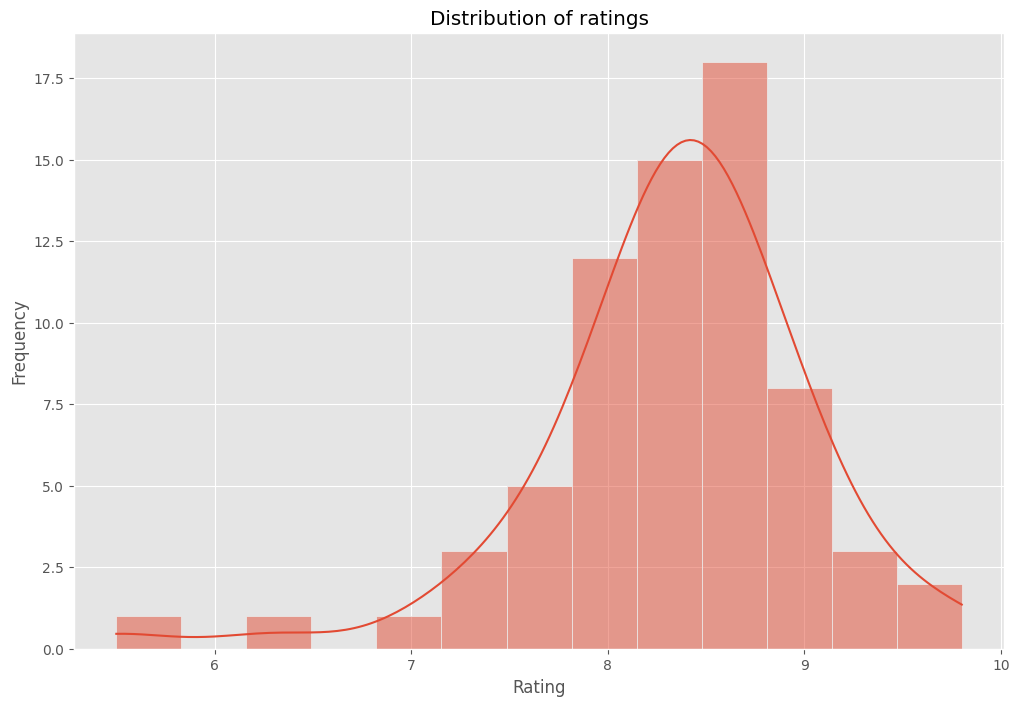

In [13]:
#distribution of ratings , and its frequency
sns.histplot(df['Rating'], kde=True)
plt.title('Distribution of ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

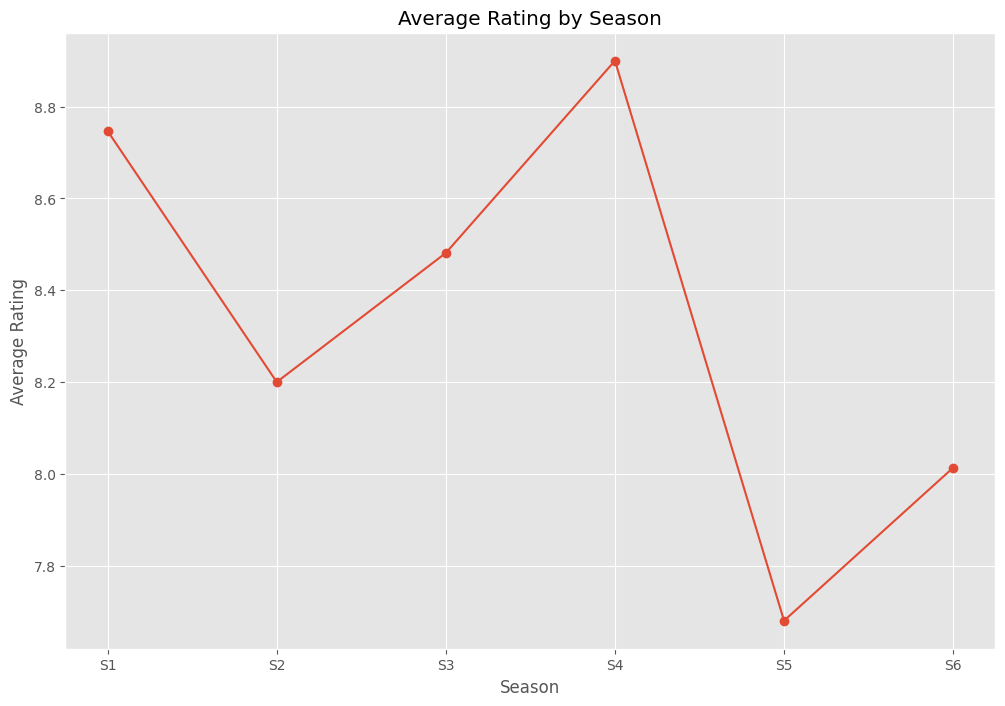

In [14]:
avg_rating_by_season = df.groupby('Season')['Rating'].mean()
avg_rating_by_season.plot(kind='line', marker='o')
plt.title('Average Rating by Season')
plt.xlabel('Season')
plt.ylabel('Average Rating')
plt.show()


In [15]:
actors=['Sboui','Janet','Azza','Slimane','Zeyneb','Fadhila','Houssi','Ameni','Fatma','Dalanda','Wassim','Kalthoum','Foufa']
actor_frequencies = {}
for actor in actors :
 df['Actor Presence'] = df['Episode Description'].str.contains(actor, case=False, na=False)
 actor_frequency = df['Actor Presence'].sum()   
 actor_frequencies[actor] = actor_frequency



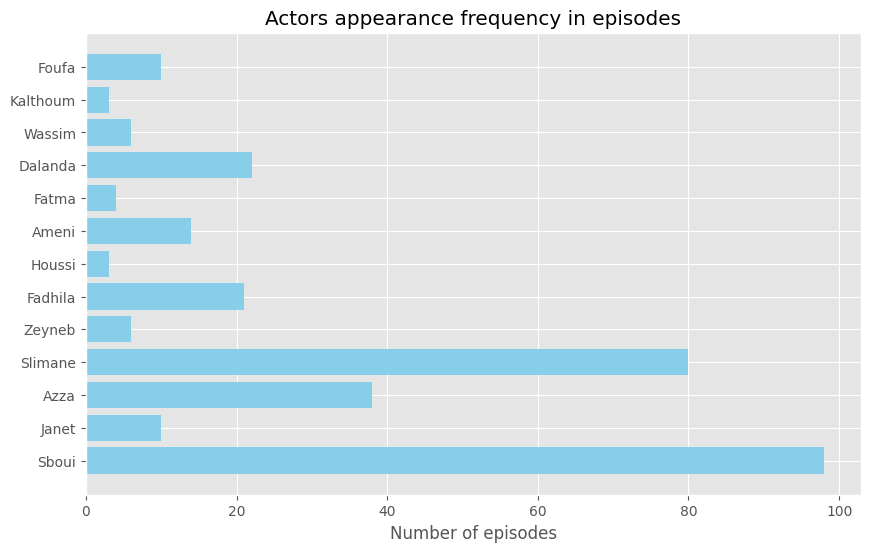

In [16]:
actors_list = list(actor_frequencies.keys())
frequencies = list(actor_frequencies.values())
plt.figure(figsize=(10, 6))
plt.barh(actors_list, frequencies, color='skyblue')
plt.xlabel('Number of episodes')
plt.title('Actors appearance frequency in episodes')
plt.show()